## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 
The company is looking at prospective properties to buy to enter the market. We need to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

## Dataset Information

## Importing Modules

In [1]:
# Required Libraries and Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import RFE

from sklearn.preprocessing import MinMaxScaler


from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline
warnings.filterwarnings('ignore')

## Importing Dataset and Basic understanding

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(1460, 81)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Unique Values
pd.set_option('display.max_rows', None)
df.apply(lambda column: len(column.unique()))

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       111
LotArea          1073
Street              2
Alley               3
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          5
MasVnrArea        328
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            5
BsmtCond            5
BsmtExposure        5
BsmtFinType1        7
BsmtFinSF1        637
BsmtFinType2        7
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          6
1stFlrSF          753
2ndFlrSF          417
LowQualFin

## Data Preprocessing

- Remove unwanted columns
- NA treatment
- Outlier treatment

## Remove unwanted columns

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Dropping ID column as it doesn't hold any value.

In [8]:
df = df.drop(columns='Id')

As it is very abvious all the below columns are highly biased. There are some others columns are biased as well but let RFE handle it. We are dropping only highly biased columns.

In [9]:
df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [10]:
df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [11]:
df['Condition2'].value_counts().head(3)

Norm      1445
Feedr        6
Artery       2
Name: Condition2, dtype: int64

In [12]:
df['RoofMatl'].value_counts().head(3)

CompShg    1434
Tar&Grv      11
WdShngl       6
Name: RoofMatl, dtype: int64

In [13]:
df['LowQualFinSF'].value_counts().head(3)

0      1434
80        3
360       2
Name: LowQualFinSF, dtype: int64

In [14]:
df['ScreenPorch'].value_counts().head(3)

0      1344
192       6
120       5
Name: ScreenPorch, dtype: int64

In [15]:
df['EnclosedPorch'].value_counts().head(3)

0      1252
112      15
96        6
Name: EnclosedPorch, dtype: int64

In [16]:
df['3SsnPorch'].value_counts().head(3)

0      1436
168       3
144       2
Name: 3SsnPorch, dtype: int64

In [17]:
df['PoolArea'].value_counts().head(3)

0      1453
512       1
648       1
Name: PoolArea, dtype: int64

In [18]:
df['MiscVal'].value_counts().head(3)

0      1408
400      11
500       8
Name: MiscVal, dtype: int64

In [19]:
# dropping all the above columns
df = df.drop(columns=['MSSubClass', 'Street', 'Utilities', 'Condition2', 'RoofMatl', 'LowQualFinSF', 'ScreenPorch', 
                      'EnclosedPorch', '3SsnPorch', 'PoolArea', 'MiscVal'])

## NA treatment

In [20]:
df.isna().sum()[df.isna().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

The below columns are NA not because the data isn't available its NA because these facilities are not available. Hence replacing these with 'NA' String.

'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'

In [21]:
for col in ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']:
    df[col] = df[col].fillna('NA')

#### NA tratment for `LotFrontage`

In [22]:
df['LotFrontage'].describe(percentiles=np.arange(0.1, 1, 0.1, dtype=float))

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
10%        44.000000
20%        53.000000
30%        60.000000
40%        63.000000
50%        69.000000
60%        74.000000
70%        79.000000
80%        85.000000
90%        96.000000
max       313.000000
Name: LotFrontage, dtype: float64

90% of the data are below 96 and the median is 69. There is no large difference from the median to 0.9 percentile hence replacing the missing value with median. Mode is not chosen for NA replacement because I feel median could be the best option for this column.

In [23]:
# Replacing NA with median
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

#### NA tratment for `Electrical`

In [24]:
df['Electrical'].isna().sum()

1

In [25]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

Only one value is missing and so NA is replaced with mode.

In [26]:
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

#### NA treatment for `Garage`

- NA values in `Garage` is also not Missing values. 

All the columns related to garage such as GarageType, GarageYrBlt, GarageFinish, GarageQual and GarageCond having 81 Missing values that is because `NA` means garage is not available. so `NA` values are replaced with 'NA' (string) except for GarageYrBlt as it not a categorical variable we have to handle it in a different way.

In [27]:
df.loc[:, df.isna().sum() == 81].head()

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,Attchd,2003.0,RFn,TA,TA
1,Attchd,1976.0,RFn,TA,TA
2,Attchd,2001.0,RFn,TA,TA
3,Detchd,1998.0,Unf,TA,TA
4,Attchd,2000.0,RFn,TA,TA


In [28]:
df[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = \
df[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna(value='NA')

In [29]:
df[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].isna().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

As `GarageYrBlt` is not a categorical variable, lets replace `NA` with mode. 

In [30]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0], inplace=True)
df['GarageYrBlt'].isna().sum()

0

#### NA treatment for `Basement`

We have only 2 missing values in total. one in BsmtFinType and another in BsmtExposure. Other than these two missing values all other `NA` means the house has no basement facility. Replacing 'NA' String in places where it is actually not missing i.e 37 places.

In [31]:
df.loc[df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isna().any(axis=1), 
          ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].shape

(39, 5)

In [32]:
df.loc[df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isna().all(axis=1), 
          ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].shape

(37, 5)

In [33]:
df.loc[df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isna().all(axis=1), 
          ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN


In [34]:
df.loc[df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isna().all(axis=1), 
          ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = \
(df.loc[df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isna().all(axis=1), 
          ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']]).fillna('NA')

Replacing the missing value with Mode

In [35]:
df.loc[df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isna().any(axis=1), 
          ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
332,Gd,TA,No,GLQ,NaN
948,Gd,TA,NaN,Unf,Unf


In [36]:
df['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
NA     37
Name: BsmtExposure, dtype: int64

In [37]:
df['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
NA       37
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [38]:
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace = True)
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace = True)

In [39]:
df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isna().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

#### NA treatment for `MasVnrArea and MasVnrType`

In [40]:
df.loc[df[['MasVnrType', 'MasVnrArea']].isna().all(axis=1), ['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [41]:
df['MasVnrArea'].value_counts().head()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
Name: MasVnrArea, dtype: int64

In [42]:
df['MasVnrType'].value_counts().head()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

Replacing NA with Mode for both `MasVnrArea and MasVnrType` as both have same rows as NA and having approx same number of mode as well.

In [43]:
df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0], inplace=True)
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True)

In [44]:
# Null values identification
df.isna().sum()

MSZoning         0
LotFrontage      0
LotArea          0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt 

## Outlier treatment

In [45]:
pd.set_option('display.max_columns', None)
df.head()

,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,NA,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,NA,NA,NA,2,2008,WD,Normal,208500
1,RL,80.0,9600,NA,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,NA,NA,NA,5,2007,WD,Normal,181500
2,RL,68.0,11250,NA,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,NA,NA,NA,9,2008,WD,Normal,223500
3,RL,60.0,9550,NA,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,NA,NA,NA,2,2006,WD,Abnorml,140000
4,RL,84.0,14260,NA,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,NA,NA,NA,12,2008,WD,Normal,250000


In [46]:
df.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1979.976027,1.767123,472.980137,94.244521,46.660274,6.321918,2007.815753,180921.195890
std,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.749688,0.747315,213.804841,125.338794,66.256028,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1984.500000,2.000000,480.000000,0.000000,25.000000,6.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,68.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,12.000000,2010.000000,755000.000000


Filtering the columns which is having their 1.0 percentile as more than 3 times of 0.9 percentile.

In [47]:
df.select_dtypes(['int64', 'float64']).loc[:, df.quantile(1) > 3*df.quantile(0.9)].describe(percentiles=np.arange(0.10, 1.0, 0.1, dtype=float))

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,BsmtHalfBath,WoodDeckSF,OpenPorchSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,103.117123,443.639726,46.549315,1057.429452,0.057534,94.244521,46.660274
std,22.027677,9981.264932,180.731373,456.098091,161.319273,438.705324,0.238753,125.338794,66.256028
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,49.000000,5000.000000,0.000000,0.000000,0.000000,636.900000,0.000000,0.000000,0.000000
20%,59.000000,7078.400000,0.000000,0.000000,0.000000,755.800000,0.000000,0.000000,0.000000
30%,60.000000,8063.700000,0.000000,0.000000,0.000000,840.000000,0.000000,0.000000,0.000000
40%,68.000000,8793.400000,0.000000,218.600000,0.000000,910.000000,0.000000,0.000000,0.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,991.500000,0.000000,0.000000,25.000000
60%,70.000000,10198.200000,16.000000,525.600000,0.000000,1088.000000,0.000000,100.000000,40.000000


No of rows having value more than 2 times of 0.9 percentile as max value in each of the above columns

In [48]:
cols_outliers = df.select_dtypes(['int64', 'float64']).loc[:, df.quantile(1) > 2*df.quantile(0.9)].describe(percentiles=np.arange(0.10, 1.0, 0.1, dtype=float)).columns

for col in cols_outliers:
    print(f'{col} : ' , len(df.select_dtypes(['int64', 'float64']).loc[df[col] > 2*df[col].quantile(0.9)]))

LotFrontage :  2
LotArea :  23
MasVnrArea :  25
BsmtFinSF1 :  3
BsmtFinSF2 :  106
TotalBsmtSF :  2
1stFlrSF :  1
2ndFlrSF :  1
GrLivArea :  3
BsmtFullBath :  1
BsmtHalfBath :  82
KitchenAbvGr :  2
Fireplaces :  5
WoodDeckSF :  11
OpenPorchSF :  22
SalePrice :  6


It seems there are so many Rows and we have only limited amout of data. Lets first plot box plot for all the numeric columns to visually see the outliers present.

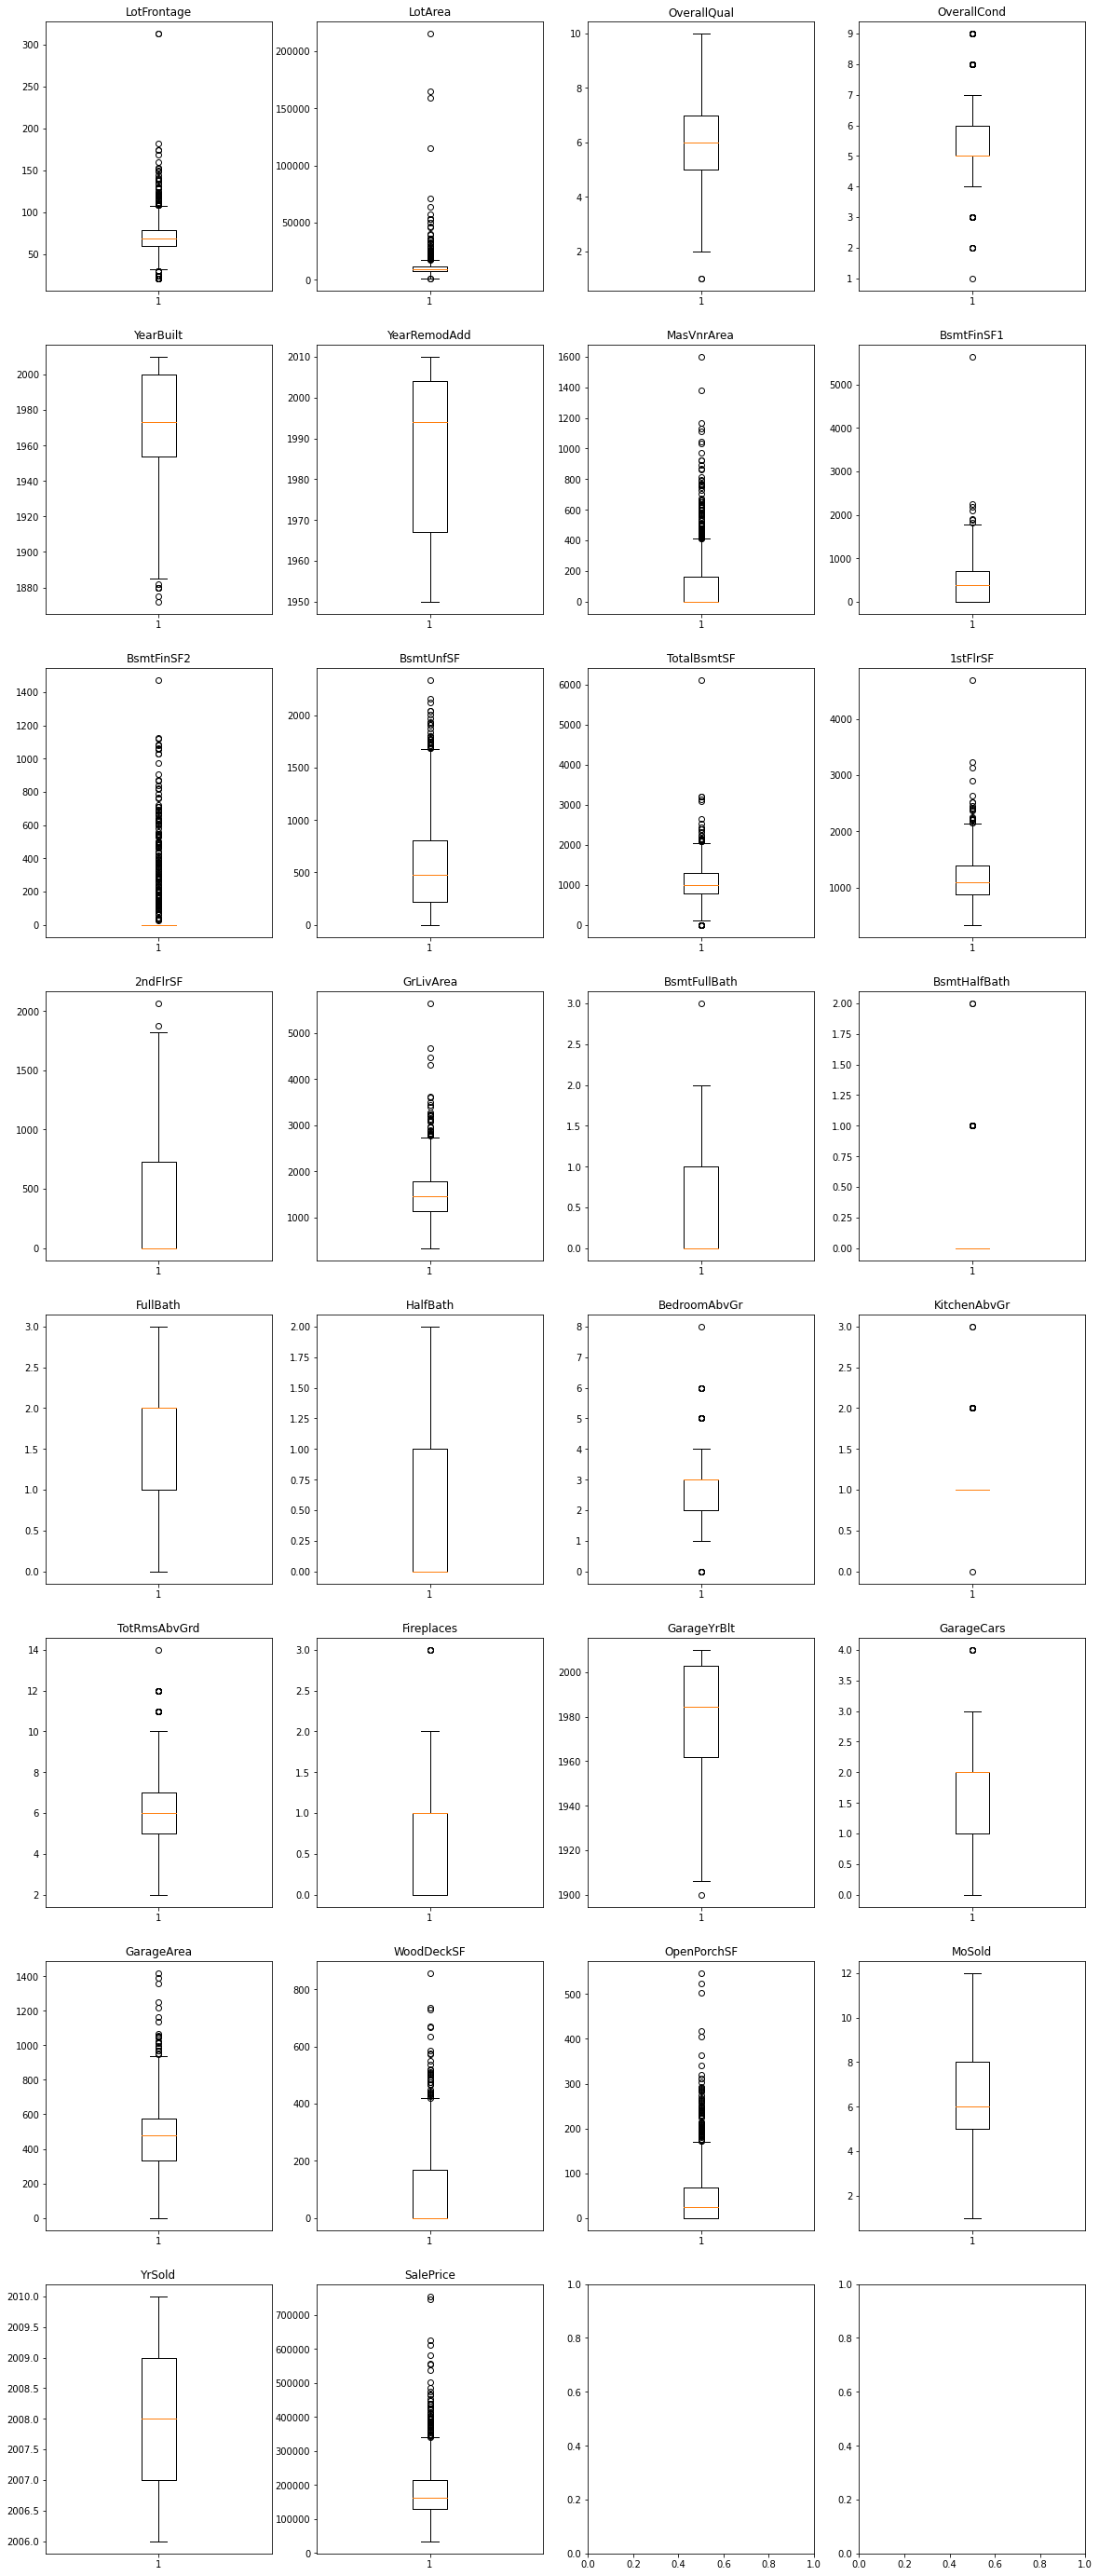

In [49]:
import math

n_cols = 4
n_rows = math.ceil(len(df.select_dtypes(['int64', 'float64']).columns)/n_cols)

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20,50))
count = 0

for i in range(n_rows):
    for j in range(n_cols):
        if count == len(df.select_dtypes(['int64', 'float64']).columns):
            break
        else:
            axs[i][j].boxplot(df.select_dtypes(['int64', 'float64']).iloc[:, count])
            axs[i][j].set_title(df.select_dtypes(['int64', 'float64']).columns[count])
            count += 1

We are only removing the very extreme outliers as when we do minmax scalling these outliers can be treated.

In [50]:
df[df['LotFrontage'] > 200].shape

(2, 69)

In [51]:
df = df[~(df['LotFrontage'] > 200)]

In [52]:
df[df['LotArea'] > 100000].shape

(4, 69)

In [53]:
df = df[~(df['LotArea'] > 100000)]

In [54]:
df[df['MasVnrArea'] > 1200].shape

(2, 69)

In [55]:
df = df[~(df['MasVnrArea'] > 1200)]

In [56]:
df[df['BsmtUnfSF'] > 2100].shape

(3, 69)

In [57]:
df = df[~(df['BsmtUnfSF'] > 2100)]

In [58]:
df[df['2ndFlrSF'] > 2000].shape

(1, 69)

In [59]:
df = df[~(df['2ndFlrSF'] > 2000)]

In [60]:
df[df['GrLivArea'] > 4000].shape

(2, 69)

In [61]:
df = df[~(df['GrLivArea'] > 4000)]

In [62]:
df[df['TotRmsAbvGrd'] > 13].shape

(1, 69)

In [63]:
df = df[~(df['TotRmsAbvGrd'] > 13)]

In [64]:
df[df['WoodDeckSF'] > 700].shape

(3, 69)

In [65]:
df = df[~(df['WoodDeckSF'] > 700)]

In [66]:
df[df['OpenPorchSF'] > 450].shape

(3, 69)

In [67]:
df = df[~(df['OpenPorchSF'] > 450)]

## Exploratory Data Analysis

In [68]:
df.head()

,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,NA,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,NA,NA,NA,2,2008,WD,Normal,208500
1,RL,80.0,9600,NA,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,NA,NA,NA,5,2007,WD,Normal,181500
2,RL,68.0,11250,NA,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,NA,NA,NA,9,2008,WD,Normal,223500
3,RL,60.0,9550,NA,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,NA,NA,NA,2,2006,WD,Abnorml,140000
4,RL,84.0,14260,NA,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,NA,NA,NA,12,2008,WD,Normal,250000


### MSZoning, LotShape, LandContour and  LotConfig

In [69]:
print(df['MSZoning'].value_counts(),'\n\n', df['LotShape'].value_counts(), '\n\n' , 
      df['LandContour'].value_counts(),'\n\n', df['LotConfig'].value_counts())

RL         1136
RM          215
FV           64
RH           15
C (all)       9
Name: MSZoning, dtype: int64 

 Reg    916
IR1    477
IR2     38
IR3      8
Name: LotShape, dtype: int64 

 Lvl    1299
Bnk      60
HLS      48
Low      32
Name: LandContour, dtype: int64 

 Inside     1039
Corner      258
CulDSac      91
FR2          47
FR3           4
Name: LotConfig, dtype: int64


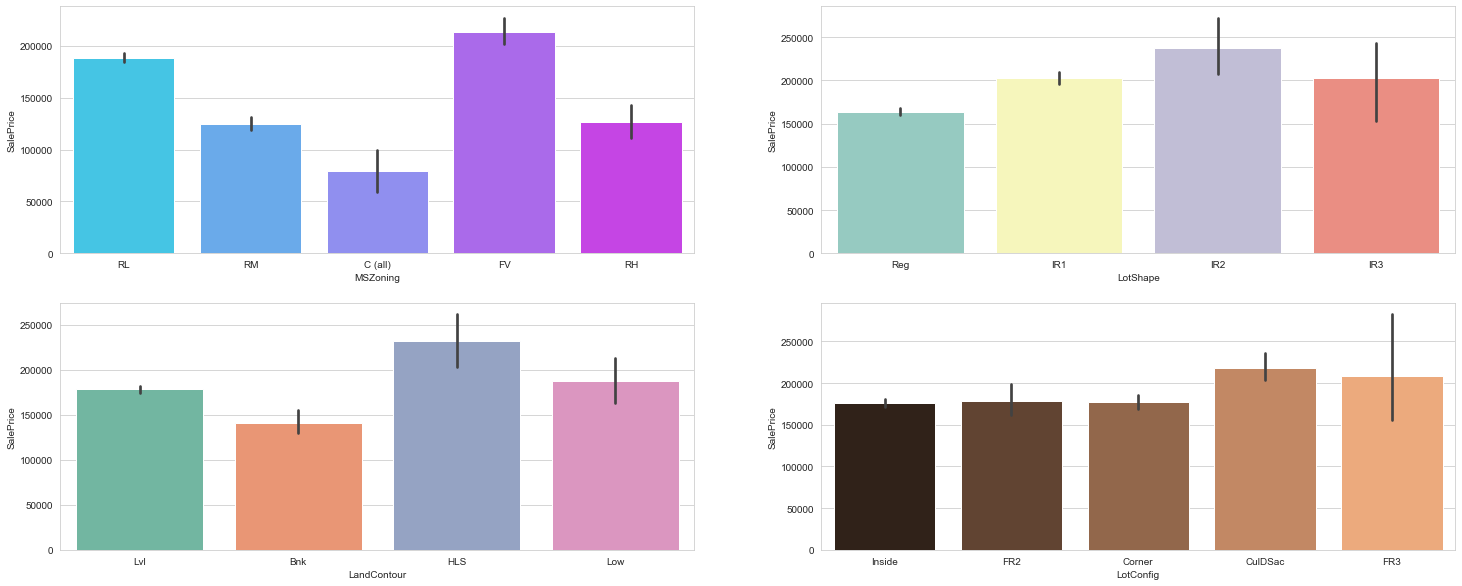

In [70]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

sns.barplot(data=df, x='MSZoning', y='SalePrice', palette='cool', estimator=np.mean, ax=ax[0][0])
sns.barplot(data=df, x='LotShape', y='SalePrice', palette='Set3', estimator=np.mean, ax=ax[0][1])
sns.barplot(data=df, x='LandContour', y='SalePrice', palette='Set2', estimator=np.mean, ax=ax[1][0])
sns.barplot(data=df, x='LotConfig', y='SalePrice', palette='copper', estimator=np.mean, ax=ax[1][1])

plt.show()

- In the first graph we can see that FV (Floating village residential) seems to be higher in price followed by RL(Low residential density)
- Top right corner graph shows the shape of the property, IR1(Slightly irregular), IR2(Moderately irregular) and IR3(Irrugular) has higher price than the Regular shaped property.
- LandContour (Property flatness) here too, HLS(significant slope) one seems to have higher price than others.
- LotConfig doesn't affect the price in larger.

### Neighbour hood

In [71]:
df['Neighborhood'].value_counts()

NAmes      224
CollgCr    150
OldTown    111
Edwards     97
Somerst     85
Gilbert     79
Sawyer      74
NridgHt     74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     38
IDOTRR      36
Timber      36
ClearCr     26
StoneBr     25
SWISU       24
Blmngtn     17
MeadowV     16
BrDale      16
Veenker     10
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

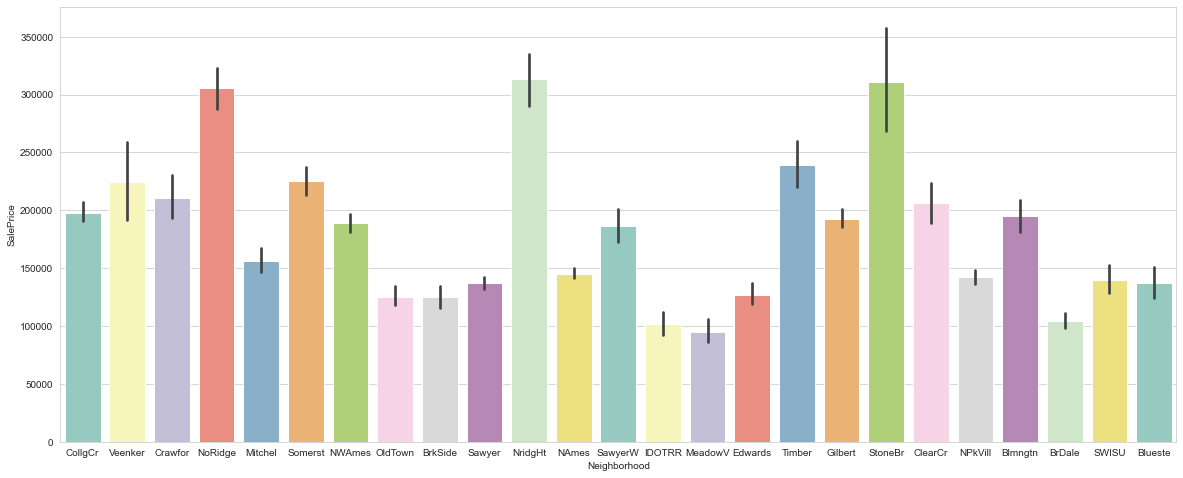

In [72]:
plt.figure(figsize=(20,8))
sns.barplot(data=df, x='Neighborhood', y='SalePrice', palette='Set3')
plt.show()

Some of the neighbourhood seems to be having very high price. Though the no of records are comparetively low its price is higher.

- NoRidge
- NridgHt
- Timber
- StoneBr

### OverallQual and OverallCond

In [73]:
df['OverallQual'].value_counts()

5     395
6     370
7     315
8     168
4     115
9      40
3      20
10     11
2       3
1       2
Name: OverallQual, dtype: int64

In [74]:
df['OverallCond'].value_counts()

5    809
6    249
7    201
8     72
4     56
3     25
9     21
2      5
1      1
Name: OverallCond, dtype: int64

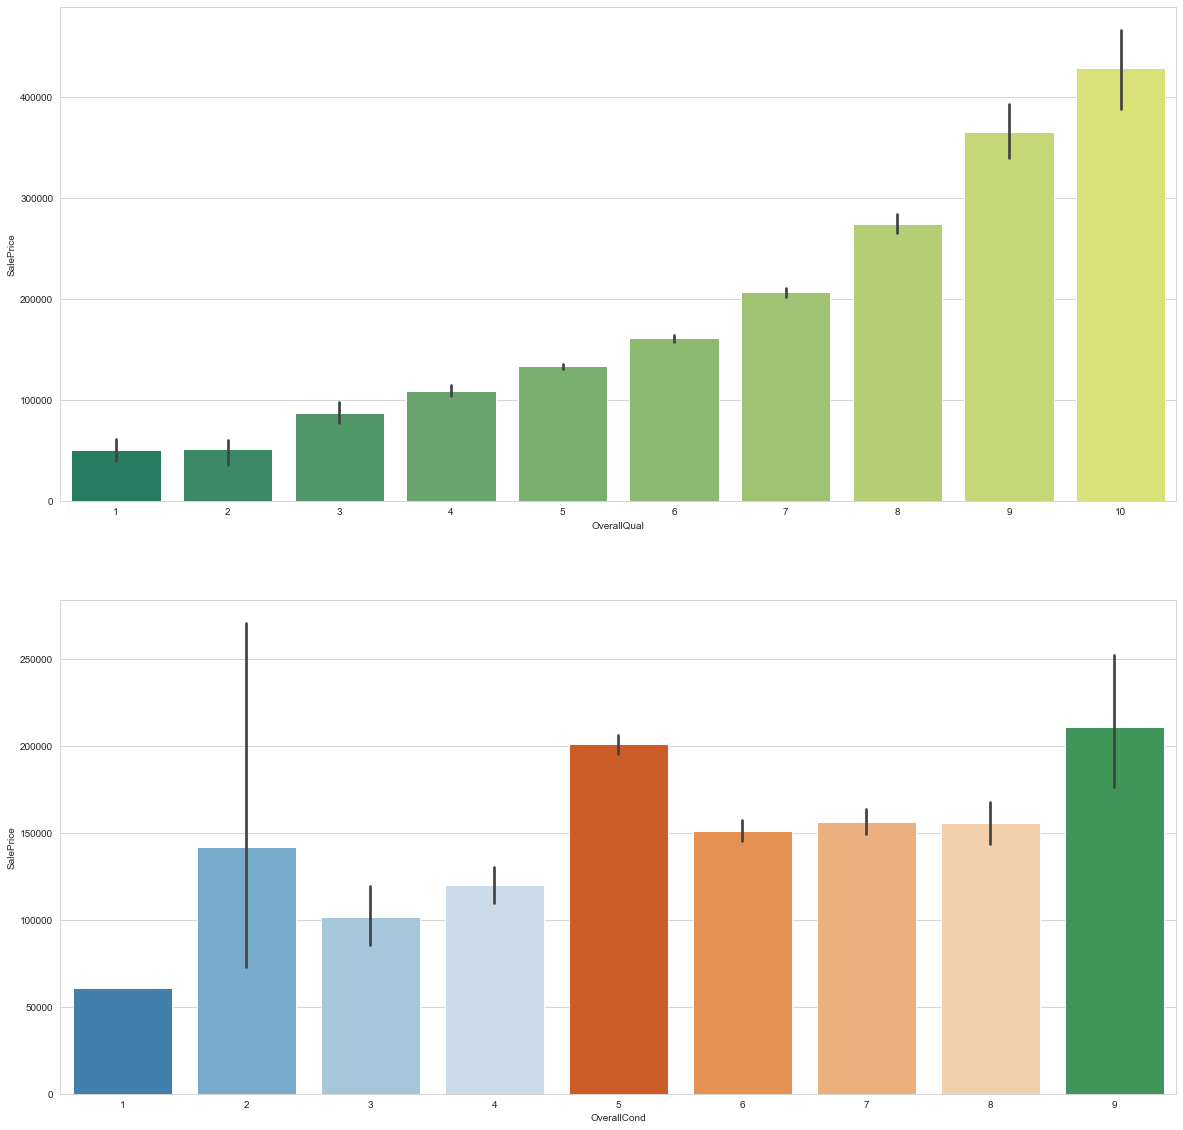

In [75]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,20))

sns.barplot(data=df, x='OverallQual', y='SalePrice', palette='summer', ax=ax[0])
sns.barplot(data=df, x='OverallCond', y='SalePrice', palette='tab20c', ax=ax[1])

plt.show()

As overall quality of the house increases, Price is also increases. Except 5 and 2 rating the same goes to overall condition.

### ExterQual and ExterCond

In [76]:
df['ExterQual'].value_counts()

TA    900
Gd    481
Ex     45
Fa     13
Name: ExterQual, dtype: int64

In [77]:
df['ExterCond'].value_counts()

TA    1264
Gd     144
Fa      28
Ex       2
Po       1
Name: ExterCond, dtype: int64

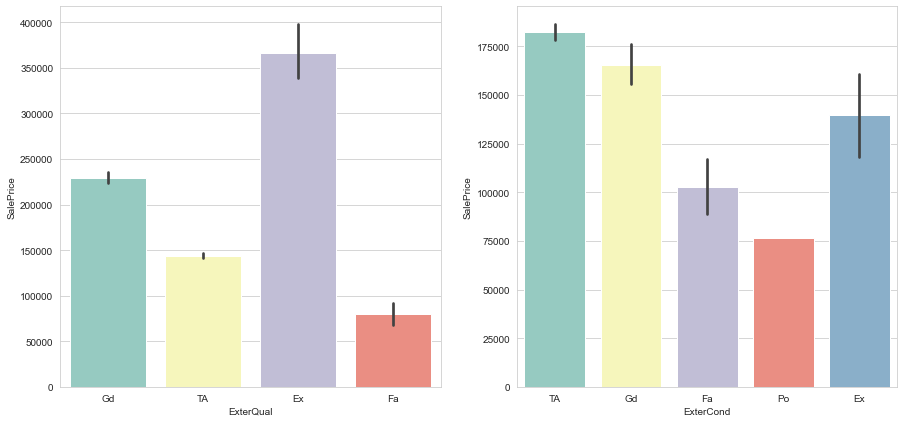

In [78]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))

sns.barplot(data=df, x='ExterQual', y='SalePrice', palette='Set3', ax=ax[0])
sns.barplot(data=df, x='ExterCond', y='SalePrice', palette='Set3', ax=ax[1])
            
plt.show()

External quality and External condition with excellent rating seems to have high price as expected. In the External condition plot TA is higher because the no of records for TA is very high compared to Ex.

### Condition1

In [79]:
df['Condition1'].value_counts()

Norm      1244
Feedr       79
Artery      47
RRAn        26
PosN        18
RRAe        11
PosA         7
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

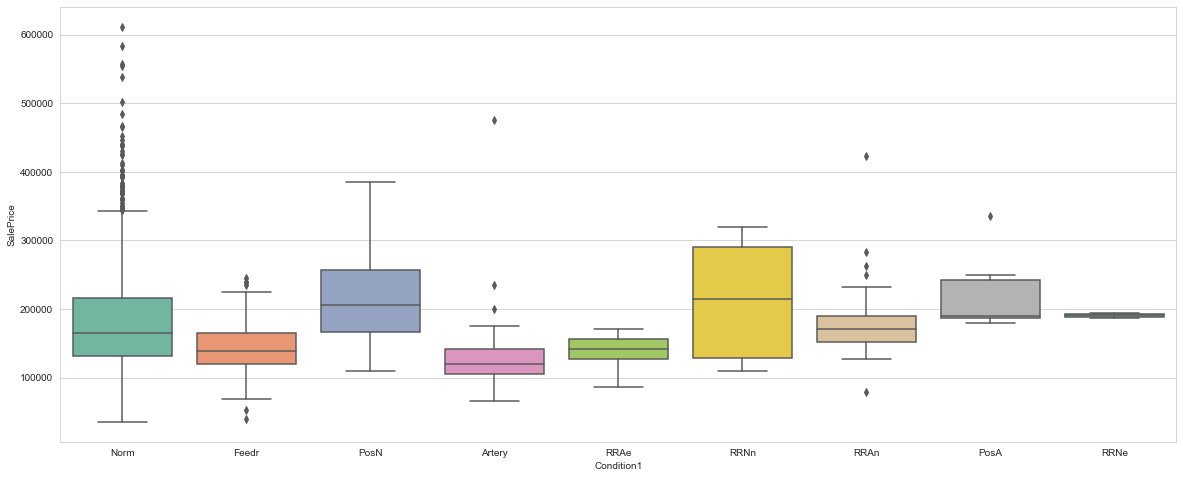

In [80]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df, x='Condition1', y='SalePrice', palette='Set2')
plt.show()

### HouseStyle

In [81]:
df['HouseStyle'].value_counts() 

1Story    718
2Story    437
1.5Fin    151
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64

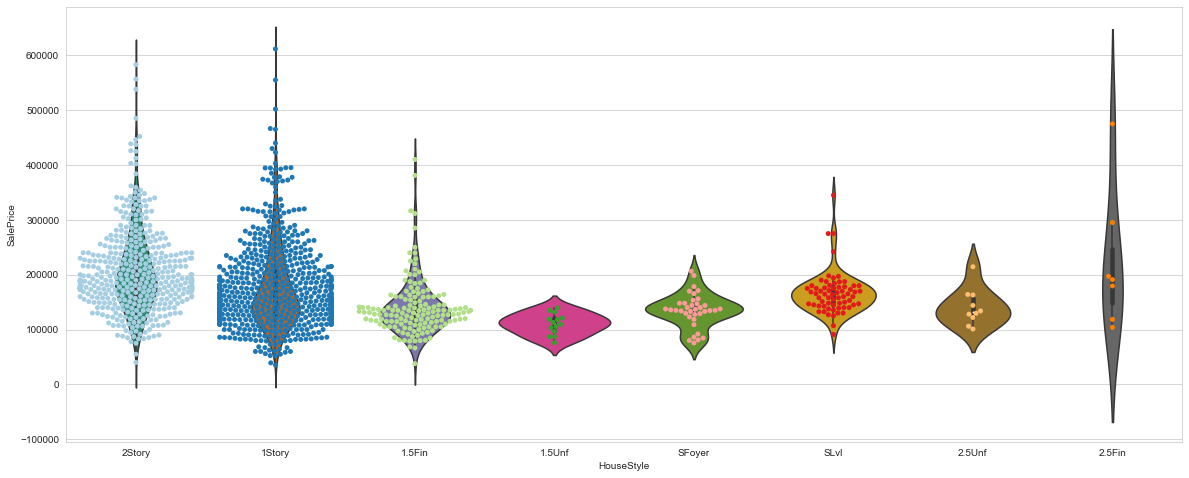

In [82]:
plt.figure(figsize=(20,8))
sns.violinplot(data=df, x='HouseStyle', y='SalePrice', palette='Dark2')
sns.swarmplot(data=df, x='HouseStyle', y='SalePrice', dodge=True, palette='Paired')
plt.show()

### BldgType

In [83]:
df["BldgType"].value_counts()

1Fam      1202
TwnhsE     113
Duplex      52
Twnhs       43
2fmCon      29
Name: BldgType, dtype: int64

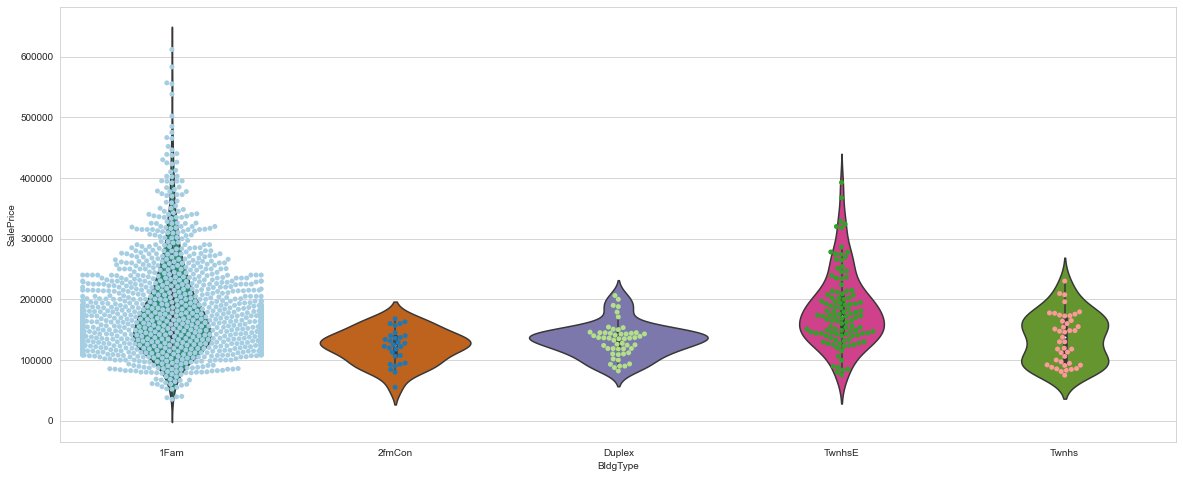

In [84]:
plt.figure(figsize=(20,8))
sns.violinplot(data=df, x='BldgType', y='SalePrice', palette='Dark2')
sns.swarmplot(data=df, x='BldgType', y='SalePrice', dodge=True, palette='Paired')
plt.show()

### YearBuilt and YearRemodAdd

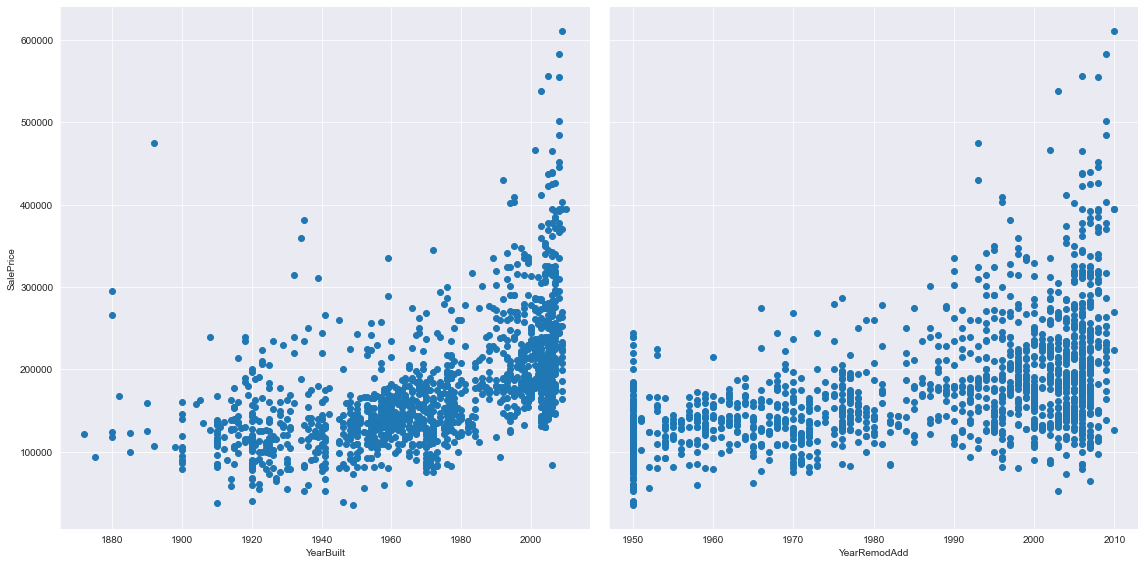

In [85]:
sns.set_style("darkgrid")
pair_grid = sns.PairGrid(data=df, x_vars= ['YearBuilt', 'YearRemodAdd'], 
                         y_vars='SalePrice', height=8)

pair_grid.map(plt.scatter)
plt.show()

### MasVnrType and MasVnrArea

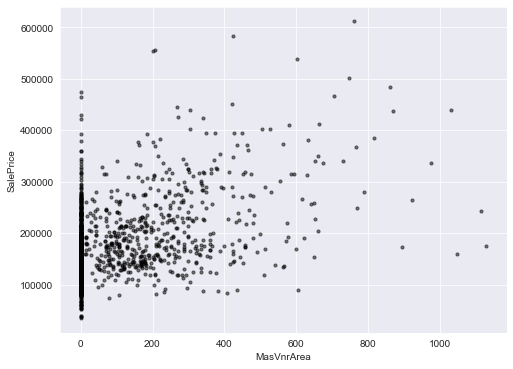

In [86]:
plt.figure(figsize=(8,6))

sns.regplot(data=df, x='MasVnrArea', y='SalePrice', fit_reg=False, scatter_kws={'s': 10, 'alpha': 0.5, 'color': 'black'},
           line_kws={'linestyle': '-.'}, color='orange')
plt.show()

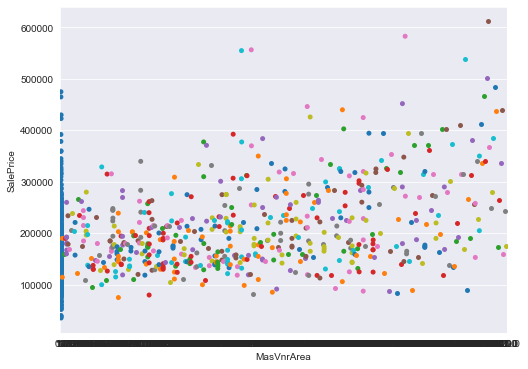

In [87]:
plt.figure(figsize=(8,6))
sns.stripplot(data=df, x='MasVnrArea', y='SalePrice', palette='tab10', jitter=True, dodge=True)
plt.show()

### 1stFlrSF

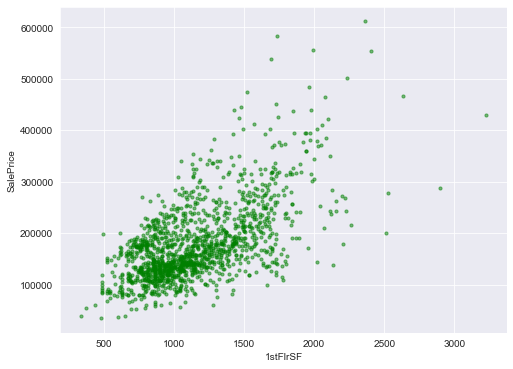

In [88]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='1stFlrSF', y='SalePrice', fit_reg=False, scatter_kws={'s': 10, 'alpha': 0.5, 'color': 'green'},
           line_kws={'linestyle': '-'}, color='red')
plt.show()

### BsmtFinType2

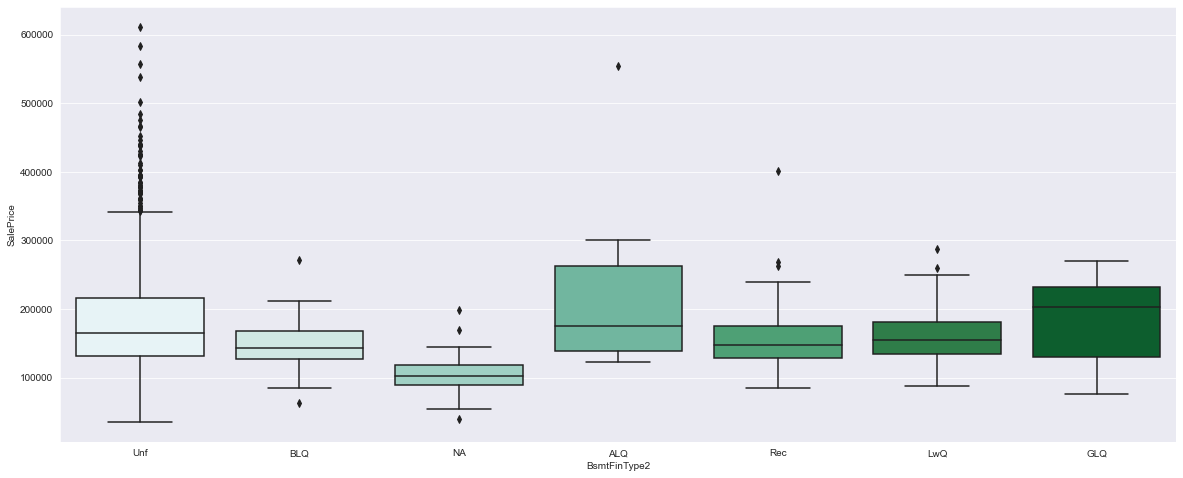

In [89]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df, x='BsmtFinType2', y='SalePrice', palette='BuGn')
plt.show()

### KitchenQual

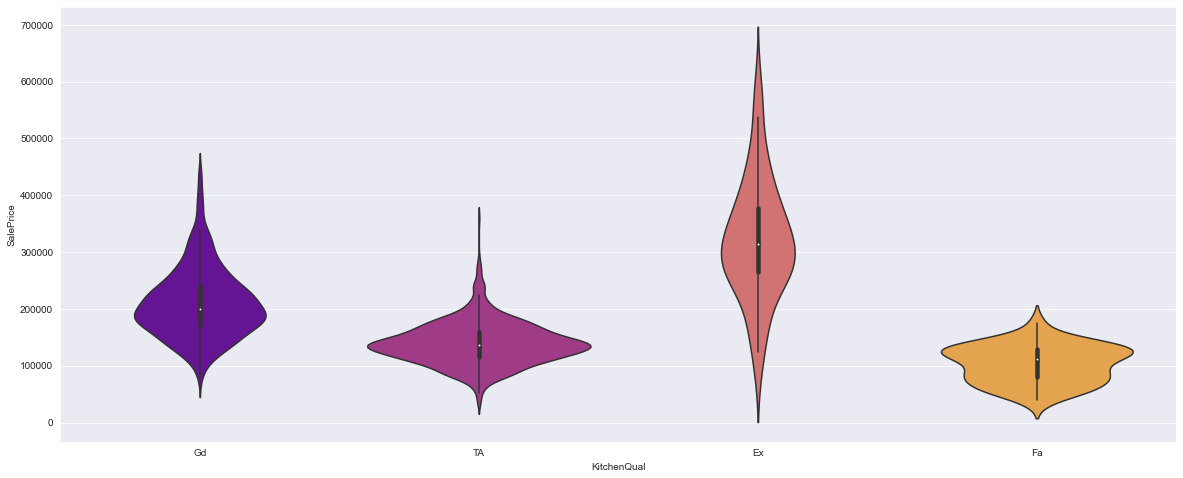

In [90]:
plt.figure(figsize=(20,8))
sns.violinplot(data=df, x='KitchenQual', y='SalePrice', palette='plasma', split=True)
plt.show()

### GarageType

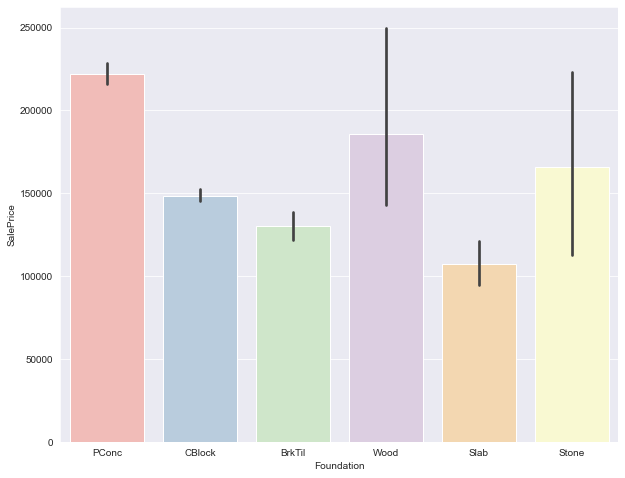

In [91]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x='Foundation', y='SalePrice', palette='Pastel1')
plt.show()

### BsmtQual and BsmtCond

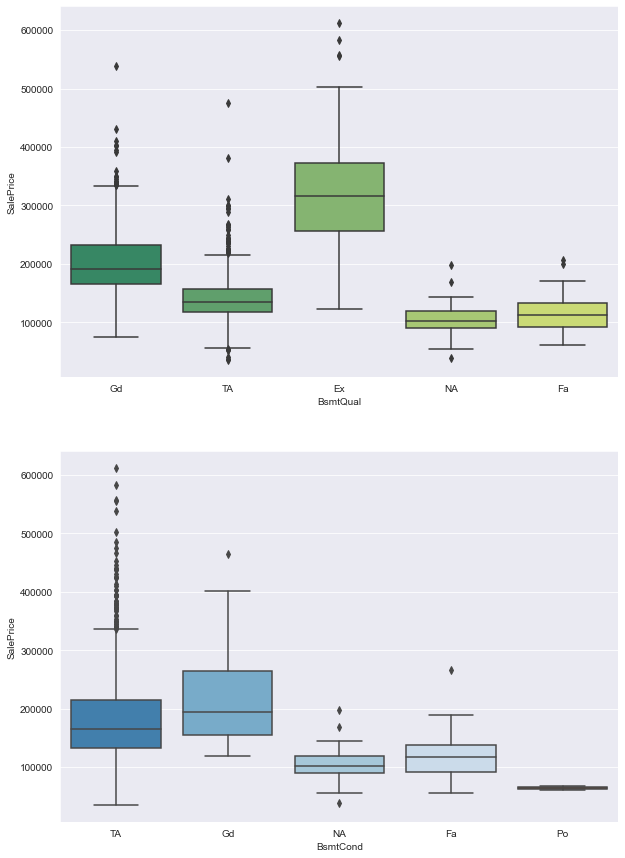

In [92]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,15))

sns.boxplot(data=df, x='BsmtQual', y='SalePrice', palette='summer', ax=ax[0])
sns.boxplot(data=df, x='BsmtCond', y='SalePrice', palette='tab20c', ax=ax[1])

plt.show()

### Foundation

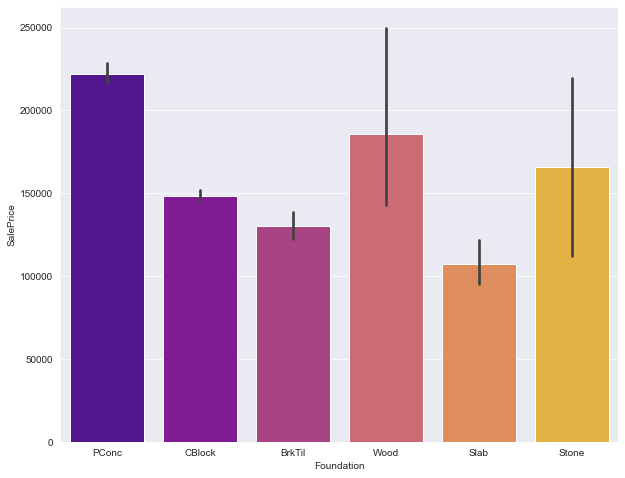

In [93]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x='Foundation', y='SalePrice', palette='plasma')
plt.show()

### OpenPorchSF

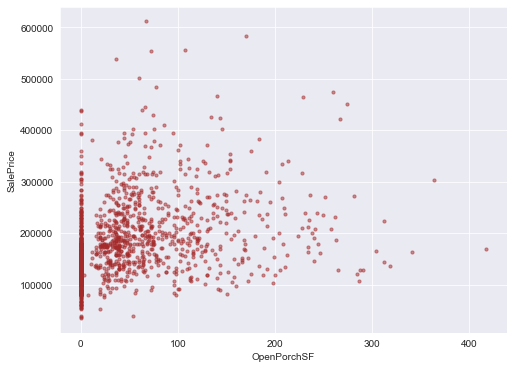

In [94]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='OpenPorchSF', y='SalePrice', fit_reg=False, scatter_kws={'s': 10, 'alpha': 0.5, 'color': 'brown'},
           line_kws={'linestyle': '-'}, color='red')
plt.show()

### GarageArea

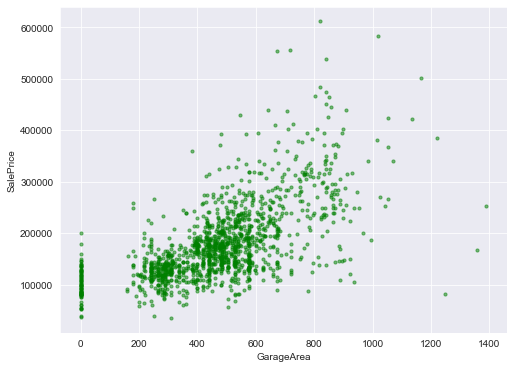

In [95]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='GarageArea', y='SalePrice', fit_reg=False, scatter_kws={'s': 10, 'alpha': 0.5, 'color': 'green'},
           line_kws={'linestyle': '-'}, color='red')
plt.show()

### GrLivArea

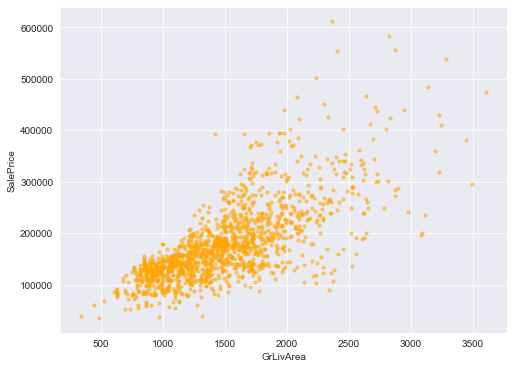

In [96]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='GrLivArea', y='SalePrice', fit_reg=False, scatter_kws={'s': 10, 'alpha': 0.5, 'color': 'orange'},
           line_kws={'linestyle': '-'}, color='red')
plt.show()

### TotalBsmtSF

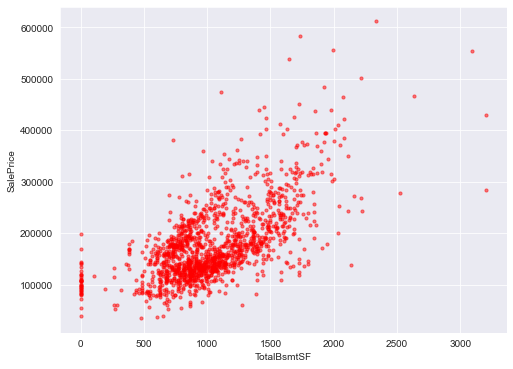

In [97]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='TotalBsmtSF', y='SalePrice', fit_reg=False, scatter_kws={'s': 10, 'alpha': 0.5, 'color': 'red'},
           line_kws={'linestyle': '-'}, color='red')
plt.show()

### LotFrontage

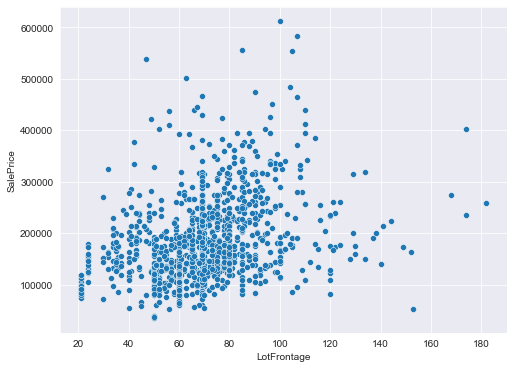

In [98]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='LotFrontage', y='SalePrice', palette='Set2')
plt.show()

### GarageYrBlt

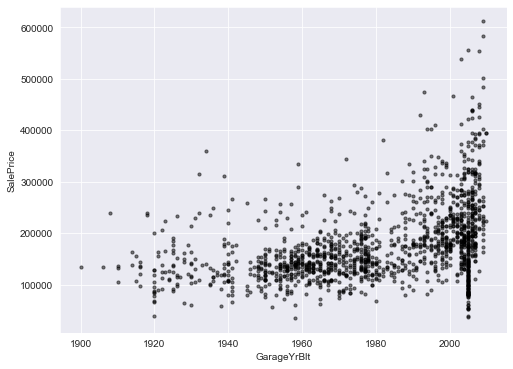

In [99]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='GarageYrBlt', y='SalePrice', fit_reg=False, scatter_kws={'s': 10, 'alpha': 0.5, 'color': 'black'},
           line_kws={'linestyle': '-'}, color='red')
plt.show()

Let's see the corr between the variables

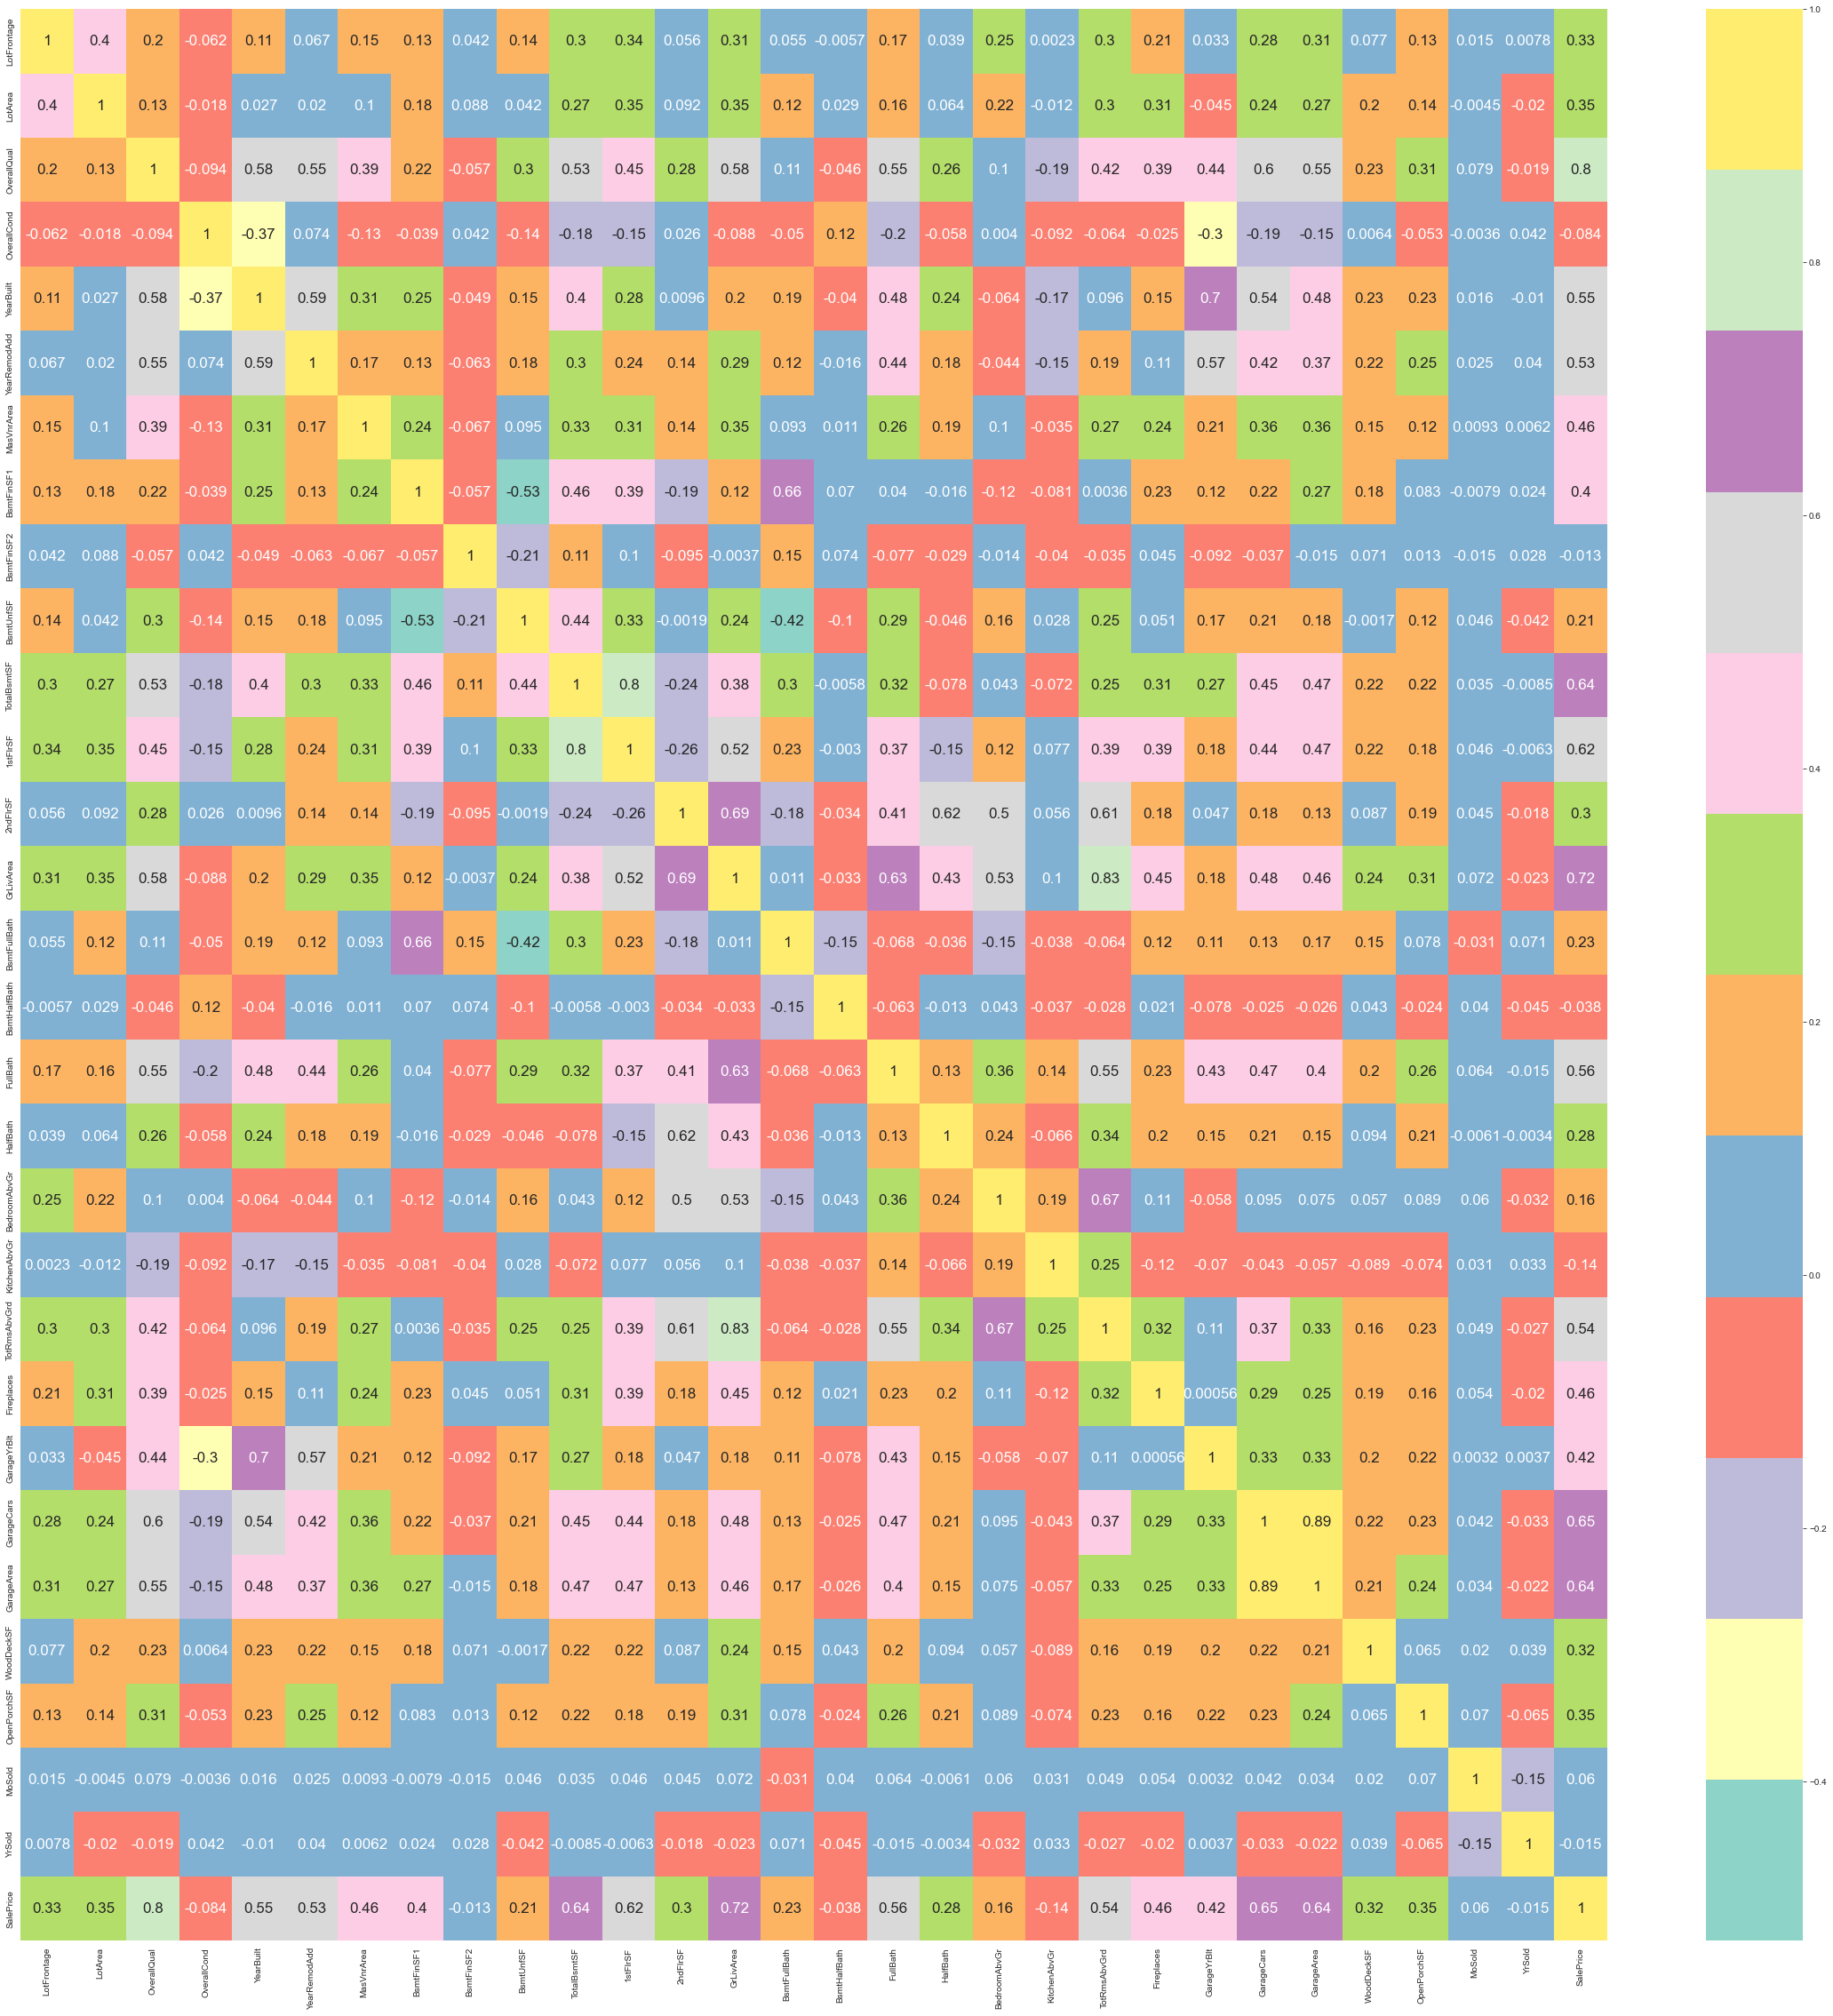

In [100]:
plt.figure(figsize = (40, 40))
sns.heatmap(df.corr(), annot = True, cmap="Set3", annot_kws={"size": 17})
plt.show()

So many variables are correlated with each. Let Regularization handles those.

## Preprocessing for Model Building

#### dtype conversion

'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageQual', 
 'GarageCond'
 
 These above columns can be converted to an numeric as these all are representation of the rating.

In [101]:
df['ExterQual'].value_counts()

TA    900
Gd    481
Ex     45
Fa     13
Name: ExterQual, dtype: int64

In [102]:
df['ExterCond'].value_counts()

TA    1264
Gd     144
Fa      28
Ex       2
Po       1
Name: ExterCond, dtype: int64

In [103]:
df['BsmtQual'].value_counts()

TA    644
Gd    610
Ex    113
NA     37
Fa     35
Name: BsmtQual, dtype: int64

In [104]:
df['BsmtCond'].value_counts()

TA    1291
Gd      65
Fa      44
NA      37
Po       2
Name: BsmtCond, dtype: int64

In [105]:
df['HeatingQC'].value_counts()

Ex    728
TA    425
Gd    236
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [106]:
df['KitchenQual'].value_counts()

TA    729
Gd    579
Ex     93
Fa     38
Name: KitchenQual, dtype: int64

In [107]:
df['GarageQual'].value_counts()

TA    1294
NA      79
Fa      47
Gd      13
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [108]:
df['GarageCond'].value_counts()

TA    1307
NA      79
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [109]:
df['PoolQC'].value_counts()

NA    1434
Fa       2
Gd       2
Ex       1
Name: PoolQC, dtype: int64

In [110]:
replace = {'TA': 3,'Gd': 4, 'Ex': 5, 'Fa': 2 , 'Po': 1 , 'NA': 0}

columns = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond', 'PoolQC']

for col in columns:
    df[col] = df[col].map(replace)

In [111]:
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1439 entries, 0 to 1458
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ExterQual    1439 non-null   int64
 1   ExterCond    1439 non-null   int64
 2   BsmtQual     1439 non-null   int64
 3   BsmtCond     1439 non-null   int64
 4   HeatingQC    1439 non-null   int64
 5   KitchenQual  1439 non-null   int64
 6   GarageQual   1439 non-null   int64
 7   GarageCond   1439 non-null   int64
 8   PoolQC       1439 non-null   int64
dtypes: int64(9)
memory usage: 112.4 KB


In [112]:
df['BsmtExposure'].value_counts()

No    947
Av    219
Gd    122
Mn    114
NA     37
Name: BsmtExposure, dtype: int64

In [113]:
replace = {'Gd': 4, 'Av': 3, 'Mn': 2 , 'No': 1 , 'NA': 0}

df['BsmtExposure'] = df['BsmtExposure'].map(replace)
df['BsmtExposure'].head()

0    1
1    4
2    2
3    1
4    3
Name: BsmtExposure, dtype: int64

In [114]:
df['BsmtFinType1'].value_counts()

Unf    427
GLQ    409
ALQ    217
BLQ    146
Rec    131
LwQ     72
NA      37
Name: BsmtFinType1, dtype: int64

In [115]:
replace = {'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

df['BsmtFinType1'] = df['BsmtFinType1'].map(replace)
df['BsmtFinType1'].head()

0    6
1    5
2    6
3    5
4    6
Name: BsmtFinType1, dtype: int64

In [116]:
df['CentralAir'].value_counts()

Y    1345
N      94
Name: CentralAir, dtype: int64

In [117]:
replace = {'N': 0, 'Y': 1}

df['CentralAir'] = df['CentralAir'].map(replace)
df['CentralAir'].head()

0    1
1    1
2    1
3    1
4    1
Name: CentralAir, dtype: int64

In [118]:
df.select_dtypes(include='object').head()

,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtFinType2,Heating,Electrical,Functional,FireplaceQu,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,RL,NA,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Unf,GasA,SBrkr,Typ,NA,Attchd,RFn,Y,NA,NA,WD,Normal
1,RL,NA,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,CBlock,Unf,GasA,SBrkr,Typ,TA,Attchd,RFn,Y,NA,NA,WD,Normal
2,RL,NA,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Unf,GasA,SBrkr,Typ,TA,Attchd,RFn,Y,NA,NA,WD,Normal
3,RL,NA,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,BrkTil,Unf,GasA,SBrkr,Typ,Gd,Detchd,Unf,Y,NA,NA,WD,Abnorml
4,RL,NA,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Unf,GasA,SBrkr,Typ,TA,Attchd,RFn,Y,NA,NA,WD,Normal


### Dummy variable creation

In [119]:
cols = df.select_dtypes(include='object').columns

for column in cols:
    dummies = pd.get_dummies(df[column], drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)

In [120]:
print(df.shape)
df.head()

(1439, 203)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,PoolQC,MoSold,YrSold,SalePrice,FV,RH,RL,RM,NA,Pave,IR2,IR3,Reg,HLS,Low,Lvl,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,None,Stone,CBlock,PConc,Slab,Stone,Wood,BLQ,GLQ,LwQ,NA,Rec,Unf,GasA,GasW,Grav,OthW,Wall,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Mod,Sev,Typ,Fa,Gd,NA,Po,TA,Attchd,Basment,BuiltIn,CarPort,Detchd,NA,NA,RFn,Unf,P,Y,GdWo,MnPrv,MnWw,NA,NA,Othr,Shed,TenC,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,65.0,8450,7,5,2003,2003,196.0,4,3,4,3,1,6,706,0,150,856,5,1,856,854,1710,1,0,2,1,3,1,4,8,0,2003.0,2,548,3,3,0,61,0,2,2008,208500,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,3,3,4,3,4,5,978,0,284,1262,5,1,1262,0,1262,0,1,2,0,3,1,3,6,1,1976.0,2,460,3,3,298,0,0,5,2007,181500,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,4,3,4,3,2,6,486,0,434,920,5,1,920,866,1786,1,0,2,1,3,1,4,6,1,2001.0,2,608,3,3,0,42,0,9,2008,223500,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,3,3,3,4,1,5,216,0,540,756,4,1,961,756,1717,1,0,1,0,3,1,4,7,1,1998.0,3,642,3,3,0,35,0,2,2006,140000,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,4,3,4,3,3,6,655,0,490,1145,5,1,1145,1053,2198,1,0,2,1,4,1,4,9,1,2000.0,3,836,3,3,192,84,0,12,2008,250000,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### Splitting into train and test

In [121]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state= 50)
print(f'Train Shape: {df_train.shape}, Test Shape: {df_test.shape}' )

Train Shape: (1007, 203), Test Shape: (432, 203)


In [122]:
cols = df_train.columns
cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       ...
       'ConLI', 'ConLw', 'New', 'Oth', 'WD', 'AdjLand', 'Alloca', 'Family',
       'Normal', 'Partial'],
      dtype='object', length=203)

### Scalling

Fit and transform using train set

In [123]:
scale = MinMaxScaler()
cols = df_train.columns
df_train[cols] = scale.fit_transform(df_train[cols])
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,PoolQC,MoSold,YrSold,SalePrice,FV,RH,RL,RM,NA,Pave,IR2,IR3,Reg,HLS,Low,Lvl,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,None,Stone,CBlock,PConc,Slab,Stone,Wood,BLQ,GLQ,LwQ,NA,Rec,Unf,GasA,GasW,Grav,OthW,Wall,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Mod,Sev,Typ,Fa,Gd,NA,Po,TA,Attchd,Basment,BuiltIn,CarPort,Detchd,NA,NA,RFn,Unf,P,Y,GdWo,MnPrv,MnWw,NA,NA,Othr,Shed,TenC,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.0,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.0,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.0,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.00000
mean,0.297458,0.125231,0.561183,0.574106,0.709603,0.573469,0.083546,0.458457,0.520357,0.697915,0.737339,0.409633,0.594340,0.202389,0.039862,0.270073,0.324492,0.774578,0.

Transforming the test set 

In [124]:
df_test[cols] = scale.transform(df_test[cols])
df_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,PoolQC,MoSold,YrSold,SalePrice,FV,RH,RL,RM,NA,Pave,IR2,IR3,Reg,HLS,Low,Lvl,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkFace,None,Stone,CBlock,PConc,Slab,Stone,Wood,BLQ,GLQ,LwQ,NA,Rec,Unf,GasA,GasW,Grav,OthW,Wall,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Mod,Sev,Typ,Fa,Gd,NA,Po,TA,Attchd,Basment,BuiltIn,CarPort,Detchd,NA,NA,RFn,Unf,P,Y,GdWo,MnPrv,MnWw,NA,NA,Othr,Shed,TenC,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.0,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.0,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.0,432.000000,432.0,432.000000,432.0,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.0,432.0,432.000000,432.000000,432.0,432.000000,432.000000,432.0,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.0,432.000000,432.000000,432.0,432.000000,432.000000,432.0,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.0,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.0,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,0.305383,0.123631,0.570216,0.566262,0.721228,0.595023,0.096425,0.472222,0.520833,0.691204,0.725116,0.387731,0.577160,0.189049,0.044090,0.289829,0.329482,0.809606,0.937500,0.375857,0.210569,0.336868,0.132716,0.016204,0.525463,0.186343,0.479167,0.520833,0.503858,0.392233,0.206019,0.736616,0.440972,0.338359,0.563426,0.562500,0.135507,0.107988,0.006366,0.474116,0.446181,0.248364,0.060185,0.004630,0.775463,0.157407,0.92824

#### Predictor and response variable split

In [125]:
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

# Model Building

#### Let's try plotting with all variables and see the results

In [126]:
lm = LinearRegression()
folds = KFold(n_splits = 5, shuffle=True, random_state=100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores

array([-2.34638250e+21, -1.27199750e+23, -6.80525714e+19, -4.75068087e+21,
       -1.97408338e+14])

We can see that the model performance is very bad. Its r2 score is negative. It's clearly showing feature elimination is required.

#### Let's try with gridSearch CV for feature elimination.

In [127]:
folds = KFold(n_splits = 5, shuffle=True, random_state=100)
hyper_params = {'n_features_to_select': list(range(25, 80))} 


lm = LinearRegression()
rfe= RFE(lm)

model_cv = GridSearchCV(estimator = rfe,
                        param_grid=hyper_params,
                        scoring = 'r2',
                        cv = folds,
                        verbose = 1,
                        return_train_score = True,
                        n_jobs=-1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 55 candidates, totalling 275 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()), n_jobs=-1,
             param_grid={'n_features_to_select': [25, 26, 27, 28, 29, 30, 31,
                                                  32, 33, 34, 35, 36, 37, 38,
                                                  39, 40, 41, 42, 43, 44, 45,
                                                  46, 47, 48, 49, 50, 51, 52,
                                                  53, 54, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [128]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.135889,0.080307,0.003811,0.000796,25,{'n_features_to_select': 25},0.830608,0.866949,0.880968,-9.269976e+25,0.852194,-1.853995e+25,3.707990e+25,55,0.900791,0.897484,0.883195,0.884359,0.905869,0.894339,0.009036
1,2.153749,0.124865,0.005558,0.005406,26,{'n_features_to_select': 26},0.830608,0.864083,0.883767,9.055210e-01,0.857767,8.683494e-01,2.519525e-02,2,0.900874,0.897841,0.884570,0.884537,0.908879,0.895340,0.009517
2,2.058781,0.246479,0.007099,0.007173,27,{'n_features_to_select': 27},0.831357,0.862413,0.881405,-1.374627e+25,0.857968,-2.749254e+24,5.498508e+24,54,0.903937,0.899229,0.884972,0.886130,0.908922,0.896638,0.009565
3,2.013734,0.075807,0.003711,0.000555,28,{'n_features_to_select': 28},0.833946,0.858941,0.903663,-1.408970e+23,0.857402,-2.817939e+22,5.635878e+22,36,0.905112,0.899967,0.891898,0.887977,0.909592,0.898909,0.008030
4,2.090138,0.072734,0.001824,0.001242,29,{'n_features_to_select': 29},0.833378,0.859039,0.831922,9.085933e-01,0.857578,8.581021e-01,2.773880e-02,3,0.905442,0.899972,0.845221,0.887974,0.909674,0.889657,0.023382


Text(0.5, 1.0, 'Train Score')

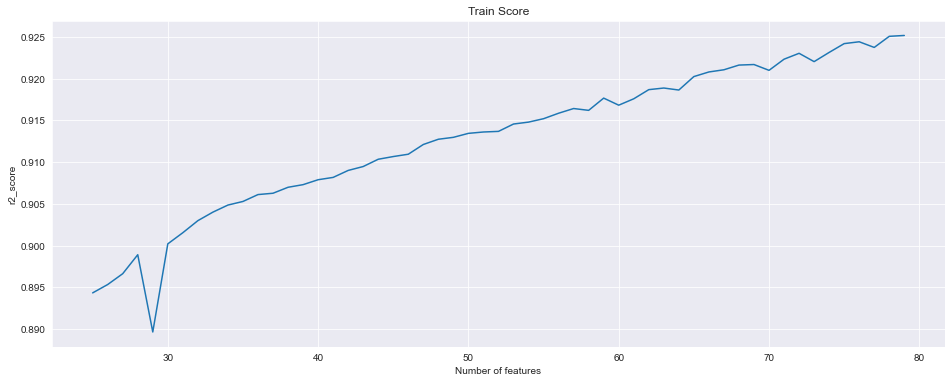

In [129]:
plt.figure(figsize = (16,6))

plt.plot(cv_results['param_n_features_to_select'], cv_results['mean_train_score'])

plt.xlabel('Number of features')
plt.ylabel('r2_score')
plt.title('Train Score')

Text(0.5, 1.0, 'Test Score')

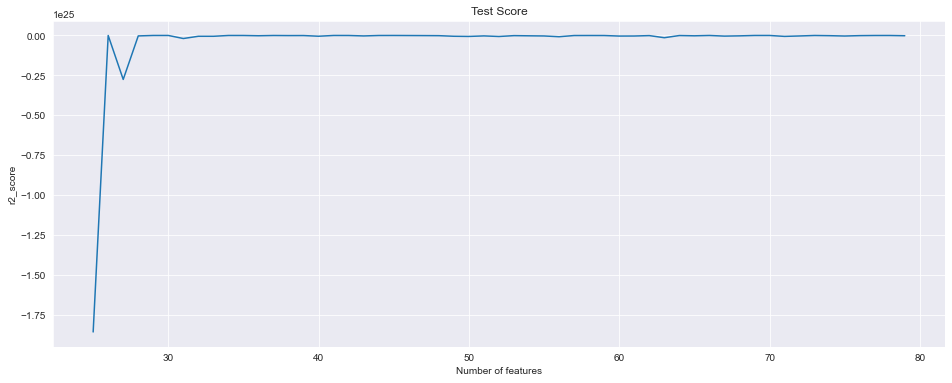

In [130]:
plt.figure(figsize = (16,6))

plt.plot(cv_results['param_n_features_to_select'], cv_results['mean_test_score'])

plt.xlabel('Number of features')
plt.ylabel('r2_score')
plt.title('Test Score')

It's very clear that RFE method does not works here. Mean train increases with respect to the no. of features where as the test score stays around zero. Its quite abvious that we have to look for other methodology.

## Ridge Regression

In [131]:
# Applying Ridge

# list of alphas to tune
params = {'alpha': [0.0001, 0.0005, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# cross validation
folds = KFold(n_splits = 5, shuffle=True, random_state=100)
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs = -1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [132]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016606,0.001005,0.003770,0.000290,0.0001,{'alpha': 0.0001},0.852809,0.847292,0.885599,0.907779,0.868686,0.872433,0.022154,25,0.938236,0.937422,0.934367,0.931706,0.942757,0.936898,0.003735
1,0.016159,0.000422,0.002934,0.000973,0.0005,{'alpha': 0.0005},0.852822,0.847955,0.885629,0.907793,0.868688,0.872577,0.022010,24,0.938236,0.937421,0.934367,0.931706,0.942757,0.936898,0.003735
2,0.020031,0.004191,0.004150,0.002817,0.001,{'alpha': 0.001},0.852838,0.848745,0.885667,0.907811,0.868691,0.872750,0.021842,22,0.938236,0.937421,0.934367,0.931706,0.942757,0.936897,0.003735
3,0.025415,0.003810,0.002806,0.001291,0.01,{'alpha': 0.01},0.853145,0.858229,0.886297,0.908065,0.868764,0.874900,0.020093,21,0.938231,0.937362,0.934356,0.931690,0.942752,0.936878,0.003737
4,0.018057,0.006302,0.004818,0.001553,0.05,{'alpha': 0.05},0.854651,0.870060,0.888602,0.908698,0.869264,0.878255,0.018649,20,0.938163,0.936994,0.934244,0.931559,0.942689,0.936730,0.003756
5,0.013293,0.001942,0.001923,0.001732,0.1,{'alpha': 0.1},0.856454,0.873991,0.890895,0.909246,0.869917,0.880101,0.018255,19,0.938049,0.936695,0.934096,0.931410,0.942586,0.936567,0.003772
6,0.011102,0.003840,0.002519,0.002064,0.2,{'alpha': 0.2},0.859518,0.877441,0.894381,0.910139,0.870934,0.882483,0.017847,18,0.937781,0.936303,0.933806,0.931145,0.942351,0.936277,0.003784
7,0.012326,0.006272,0.006038,0.004140,0.3,{'alpha': 0.3},0.861971,0.879474,0.896955,0.910863,0.871625,0.884177,0.017597,17,0.937485,0.935980,0.933507,0.930883,0.942093,0.935990,0.003788
8,0.016308,0.005074,0.001981,0.001783,0.4,{'alpha': 0.4},0.863970,0.880966,0.898956,0.911462,0.872099,0.885491,0.017428,16,0.937175,0.935674,0.933199,0.930616,0.941825,0.935698,0.003789
9,0.017286,0.005067,0.000980,0.001200,0.5,{'alpha': 0.5},0.865632,0.882153,0.900565,0.911965,0.872427,0.886549,0.017313,14,0.936860,0.935375,0.932886,0.930343,0.941551,0.935403,0.003791


In [133]:
cv_results[['param_alpha', 'mean_train_score', 'mean_test_score']].head(10)

,param_alpha,mean_train_score,mean_test_score
0,0.0001,0.936898,0.872433
1,0.0005,0.936898,0.872577
2,0.001,0.936897,0.872750
3,0.01,0.936878,0.874900
4,0.05,0.936730,0.878255
5,0.1,0.936567,0.880101
6,0.2,0.936277,0.882483
7,0.3,0.935990,0.884177
8,0.4,0.935698,0.885491
9,0.5,0.935403,0.886549


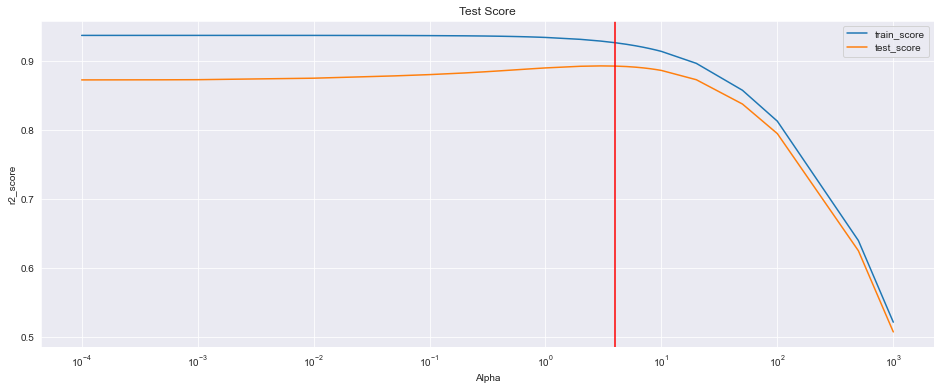

In [134]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float64')

plt.figure(figsize = (16,6))

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])

plt.xlabel('Alpha')
plt.ylabel('r2_score')
plt.title('Test Score')
plt.xscale('log')
plt.legend(['train_score', 'test_score'], loc='upper right')
plt.axvline(4, color='red')

Let's choose the alpha 4 where we have train accuracy 0.9356 and test accuracy 0.8854

In [135]:
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

# lasso model parameters
param = list(ridge.coef_ )
param = [round(x, 3) for x in param]
cols = X_train.columns

param = pd.DataFrame(list(zip(cols, param)))
param.columns = ['Variable', 'Coeff']
param.head()

,Variable,Coeff
0,LotFrontage,0.025
1,LotArea,0.063
2,OverallQual,0.105
3,OverallCond,0.048
4,YearBuilt,0.019


Ridge penalise the model for becoming complex but unlike lasso it doesn't brings the brings the co.eff to zero rather it brings all the co.eff near zero.

In [136]:
# prediction on the train and test set
y_train_pred = ridge.predict(X_train)
print('R2_Score on train set: ', r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = ridge.predict(X_test)
print('R2_Score on test set: ', r2_score(y_true=y_test, y_pred=y_test_pred))

R2_Score on train set:  0.9245870608938693
R2_Score on test set:  0.9010791494603458


In [137]:
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE : 0.042472081945778305


## Lasso Regression

In [138]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.0005, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = KFold(n_splits = 5, shuffle=True, random_state=100)
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs = -1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [139]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.049447,0.016722,0.004963,0.001171,0.0001,{'alpha': 0.0001},0.874796,0.899597,0.918943,0.919974,0.876587,0.897979,0.019601,1,0.929674,0.928318,0.925162,0.922968,0.934520,0.928128,0.003968
1,0.027509,0.007688,0.004788,0.003998,0.0005,{'alpha': 0.0005},0.846339,0.889891,0.924927,0.901017,0.860414,0.884518,0.028187,2,0.910148,0.904776,0.902306,0.898745,0.910887,0.905373,0.004624
2,0.018972,0.002188,0.010696,0.012665,0.001,{'alpha': 0.001},0.815049,0.858440,0.913132,0.879049,0.840472,0.861228,0.033415,3,0.885295,0.879560,0.872530,0.873722,0.884055,0.879032,0.005200
3,0.016040,0.006758,0.003996,0.000998,0.01,{'alpha': 0.01},0.433362,0.467225,0.471338,0.474448,0.389651,0.447205,0.032340,4,0.478822,0.487392,0.460315,0.445623,0.447467,0.463924,0.016682
4,0.013010,0.002891,0.004242,0.000682,0.05,{'alpha': 0.05},-0.074791,-0.000643,-0.008875,-0.003556,-0.011884,-0.019950,0.027701,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [140]:
cv_results['param_alpha'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 29 entries, 0 to 28
Series name: param_alpha
Non-Null Count  Dtype 
--------------  ----- 
29 non-null     object
dtypes: object(1)
memory usage: 360.0+ bytes


In [141]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float64')

In [142]:
cv_results['param_alpha'].head()

0    0.0001
1    0.0005
2    0.0010
3    0.0100
4    0.0500
Name: param_alpha, dtype: float64

In [143]:
cv_results[['param_alpha', 'mean_train_score', 'mean_test_score']].head(10)

,param_alpha,mean_train_score,mean_test_score
0,0.0001,0.928128,0.897979
1,0.0005,0.905373,0.884518
2,0.0010,0.879032,0.861228
3,0.0100,0.463924,0.447205
4,0.0500,0.000000,-0.019950
5,0.1000,0.000000,-0.019950
6,0.2000,0.000000,-0.019950
7,0.3000,0.000000,-0.019950
8,0.4000,0.000000,-0.019950
9,0.5000,0.000000,-0.019950


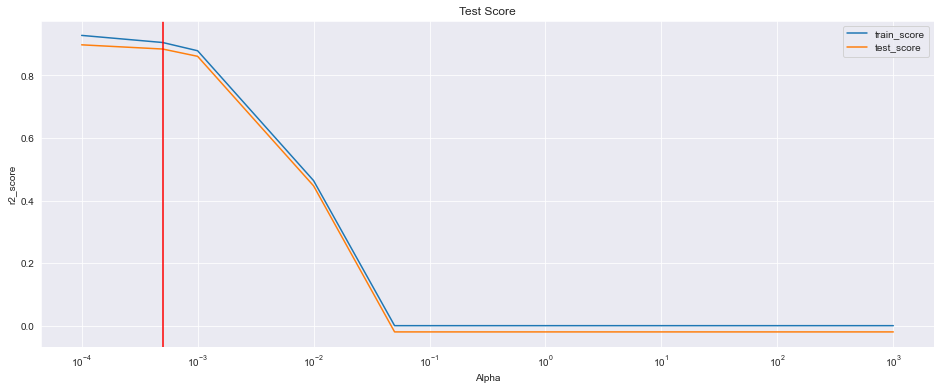

In [144]:
plt.figure(figsize = (16,6))

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])

plt.xlabel('Alpha')
plt.ylabel('r2_score')
plt.title('Test Score')
plt.xscale('log')
plt.legend(['train_score', 'test_score'], loc='upper right')
plt.axvline(0.0005, color='red')

Lets select alpha 0.0005 where we have train accuracy of R2_score is 0.9053 and test score 0.8845.  Lets select this alpha value and build lasso regression and compare with the test data set.

In [145]:
alpha = 0.0005
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

# lasso model parameters
param = list(lasso.coef_ )
param = [round(x, 3) for x in param]
cols = X_train.columns

param = pd.DataFrame(list(zip(cols, param)))
param.columns = ['Variable', 'Coeff']
param[param['Coeff'] > 0]

,Variable,Coeff
1,LotArea,0.046
2,OverallQual,0.159
3,OverallCond,0.026
5,YearRemodAdd,0.013
6,MasVnrArea,0.037
7,ExterQual,0.054
9,BsmtQual,0.004
11,BsmtExposure,0.032
13,BsmtFinSF1,0.088
16,TotalBsmtSF,0.004


In [146]:
param[param['Coeff'] > 0].shape

(43, 2)

Lasso regression has an advantage over ridge that is it brings most of the predictor variables to zero. Lets see the r2_score on the test data set.

In [147]:
# prediction on the train and test set
y_train_pred = lasso.predict(X_train)
print('R2_Score on train set: ', r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lasso.predict(X_test)
print('R2_Score on test set: ', r2_score(y_true=y_test, y_pred=y_test_pred))

R2_Score on train set:  0.9034267539833389
R2_Score on test set:  0.8804515883386271


In [148]:
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE : 0.04669082358085752


The results are very good in lasso regression as well.

By Comparing both ridge and lasso regression. Though there is no large difference in prediction but still Ridge has r2_score slighly higher and lower RMSE in comparision with lasso. Despite having slightly higher R2_score and lower RMSE in Ridge its better to choose lasso as it is simple and robust.

## Residual Analysis 

##### 1 . Verifying whether the error terms are normally distributed

In [149]:
res_train = y_train - y_train_pred 
res_test = y_test - y_test_pred

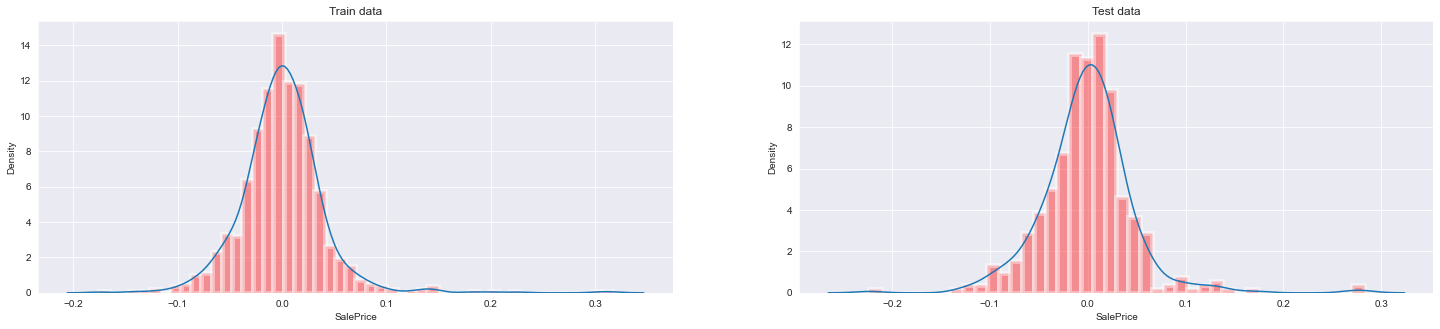

In [150]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25,5))
sns.distplot(res_train, hist_kws={'color':'red', 'lw':5}, ax=axs[0])
axs[0].set_title('Train data')
sns.distplot(res_test, hist_kws={'color':'red', 'lw':5}, ax=axs[1])
axs[1].set_title('Test data')
plt.show()

Just like we expected the error terms (residuals) are normally distributed.

##### 2 . Verifying the error terms having constant variance accross different independent variables and they do not follow any pattern

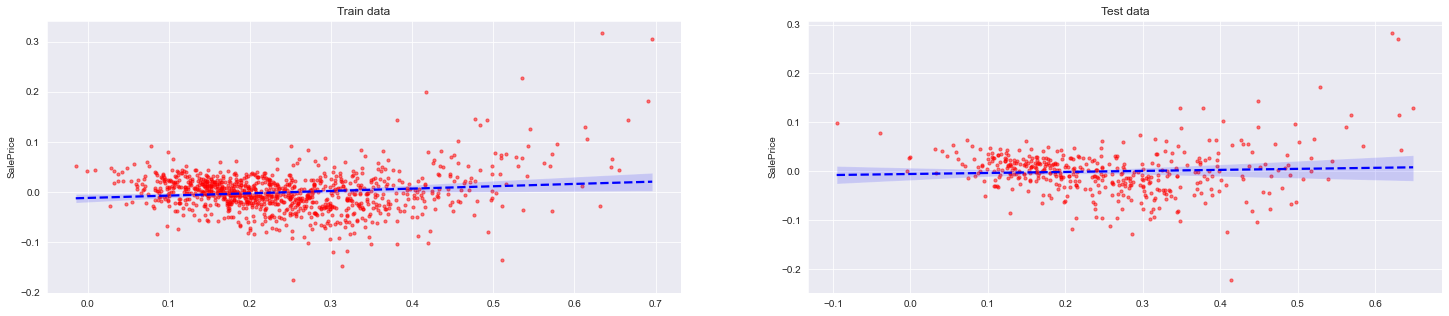

<Figure size 576x432 with 0 Axes>

In [151]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25,5))
plt.figure(figsize=(8,6))

sns.regplot(x=y_train_pred, y=res_train, fit_reg=True, scatter_kws={'s': 10, 'alpha': 0.5, 'color': 'red'},
           line_kws={'linestyle': '--'}, color='blue', ax=axs[0])


sns.regplot(x=y_test_pred, y=res_test, fit_reg=True, scatter_kws={'s': 10, 'alpha': 0.5, 'color': 'red'},
           line_kws={'linestyle': '--'}, color='blue', ax=axs[1])

axs[1].set_title('Test data')
axs[0].set_title('Train data')

plt.show()

Just like we expected error terms having constant variance and they do not follow any pattern. 

### Top 5 Positive co.efficients i.e) Sales increase with respect to these variables

In [152]:
param.sort_values('Coeff', ascending=False).head(5)

,Variable,Coeff
21,GrLivArea,0.266
2,OverallQual,0.159
13,BsmtFinSF1,0.088
7,ExterQual,0.054
194,New,0.050


### Top 5 Negative co.efficients i.e) Sales decrease with respect to these variables

In [153]:
param.sort_values('Coeff', ascending=True).head()

,Variable,Coeff
94,TwnhsE,-0.014
93,Twnhs,-0.013
92,Duplex,-0.009
167,NA,-0.008
136,BrkFace,-0.006


### Final Model

In [154]:
lasso.intercept_

model = str(round(lasso.intercept_, 3)) + " + "

for var, coeff in zip(param[param['Coeff'] > 0]['Variable'], param[param['Coeff'] > 0]['Coeff']):
    model += str(coeff) + '*' + var + ' + '

model = model[:-3]

print('Final Model : ', model)

Final Model :  -0.136 + 0.046*LotArea + 0.159*OverallQual + 0.026*OverallCond + 0.013*YearRemodAdd + 0.037*MasVnrArea + 0.054*ExterQual + 0.004*BsmtQual + 0.032*BsmtExposure + 0.088*BsmtFinSF1 + 0.004*TotalBsmtSF + 0.002*HeatingQC + 0.037*1stFlrSF + 0.266*GrLivArea + 0.013*HalfBath + 0.04*KitchenQual + 0.029*GarageCars + 0.028*GarageArea + 0.012*WoodDeckSF + 0.015*OpenPorchSF + 0.009*RL + 0.005*IR2 + 0.012*CulDSac + 0.002*Mod + 0.003*BrkSide + 0.016*Crawfor + 0.019*NoRidge + 0.034*NridgHt + 0.004*Somerst + 0.038*StoneBr + 0.012*Norm + 0.006*1Story + 0.01*Hip + 0.012*BrkFace + 0.006*CemntBd + 0.004*VinylSd + 0.011*Stone + 0.01*PConc + 0.014*Typ + 0.002*Gd + 0.009*BuiltIn + 0.004*Y + 0.05*New + 0.006*Normal
